In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown
import numpy as np
import pandas as pd
df = pd.read_csv("drive/MyDrive/College_admission.csv")
print(df.head())

   admit  gre   gpa  ses  Gender_Male  Race  rank
0      0  380  3.61    1            0     3     3
1      1  660  3.67    2            0     2     3
2      1  800  4.00    2            0     2     1
3      1  640  3.19    1            1     2     4
4      0  520  2.93    3            1     2     4


In [ ]:
properties = list(df.columns.values)
properties.remove('admit')
#properties.remove('Gender_Male')
#properties.remove('Race')
#properties.remove('ses')
print(properties)
X = df[properties]
y = df['admit']

['gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank']


In [ ]:
print(X.head())

   gre   gpa  ses  Gender_Male  Race  rank
0  380  3.61    1            0     3     3
1  660  3.67    2            0     2     3
2  800  4.00    2            0     2     1
3  640  3.19    1            1     2     4
4  520  2.93    3            1     2     4


In [ ]:
print(y.head())
 

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64


In [ ]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.67, random_state=1)



In [ ]:
del X_train['Gender_Male']
del X_train['ses']
del X_train['Race']
del X_test['Gender_Male']
del X_test['ses']
del X_test['Race']



In [ ]:
print(X_train.head())

print(y_train.head())

     gre   gpa  rank
143  580  3.40     3
232  380  3.38     2
334  460  3.64     3
32   600  3.40     3
317  780  3.63     4
143    0
232    0
334    1
32     0
317    1
Name: admit, dtype: int64


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(3,)),
   ## keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(45, activation=tf.nn.relu),
    keras.layers.Dense(45, activation=tf.nn.relu),
   	keras.layers.Dense(45, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


In [ ]:
#model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy',  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/300
3/3 [==============================] - 1s 4ms/step - loss: 12.1607 - accuracy: 0.6818
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 3.2382 - accuracy: 0.6818
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 1.6659 - accuracy: 0.3182
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 0.7493 - accuracy: 0.4394
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 0.7355 - accuracy: 0.4394
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.6818
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 0.7470 - accuracy: 0.6818
Epoch 8/300
3/3 [==============================] - 0s 6ms/step - loss: 0.9938 - accuracy: 0.3182
Epoch 9/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.6818
Epoch 10/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6638 - accuracy: 0.5303
Epoch 11/300
3/3 [==========

In [ ]:
##TODO: Make df of predicted admit of validation set
print(X_val)
X_val_pred = X_val[['gre','gpa','rank']].copy()


     gre   gpa  ses  Gender_Male  Race  rank
362  680  3.14    1            1     1     2
40   560  2.42    1            1     3     2
332  420  2.96    2            1     2     1
353  700  3.52    3            0     3     2
276  460  3.77    2            0     3     3
..   ...   ...  ...          ...   ...   ...
274  520  3.12    3            0     1     2
206  740  3.54    2            0     1     1
290  620  3.45    3            0     3     2
357  720  3.31    3            1     2     1
359  720  3.94    3            1     3     3

[134 rows x 6 columns]


In [ ]:
#predict admit for validation set
admit_prediction = model.predict(X_val_pred)
print(admit_prediction)

[[0.0281626 ]
 [0.04633433]
 [0.08840171]
 [0.02592137]
 [0.06472951]
 [0.03619781]
 [0.018576  ]
 [0.06459913]
 [0.01694423]
 [0.04679072]
 [0.05460688]
 [0.02824143]
 [0.06464595]
 [0.02816001]
 [0.01845163]
 [0.08869934]
 [0.04309714]
 [0.05069327]
 [0.04651165]
 [0.04274681]
 [0.04272157]
 [0.03637463]
 [0.01843488]
 [0.02836499]
 [0.06466314]
 [0.03926787]
 [0.04651165]
 [0.02593237]
 [0.07062054]
 [0.07566914]
 [0.06430885]
 [0.04280818]
 [0.03628156]
 [0.02822423]
 [0.05935165]
 [0.0888868 ]
 [0.03937611]
 [0.03938001]
 [0.02198035]
 [0.08867976]
 [0.02373642]
 [0.06478301]
 [0.05973488]
 [0.04281342]
 [0.07574084]
 [0.02602637]
 [0.03338072]
 [0.03645945]
 [0.03342563]
 [0.02388862]
 [0.05458727]
 [0.03939682]
 [0.03328481]
 [0.01703787]
 [0.05504906]
 [0.03079391]
 [0.05489129]
 [0.03349417]
 [0.05053604]
 [0.01699227]
 [0.0887627 ]
 [0.05084339]
 [0.02596265]
 [0.03952339]
 [0.08867165]
 [0.01845831]
 [0.03959587]
 [0.01565802]
 [0.02393249]
 [0.02821502]
 [0.04641458]
 [0.03

In [ ]:
#fit data to 1s or 0s
admit_prediction = admit_prediction >0.5
admit_prediction = 1*admit_prediction
print(admit_prediction)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
#append predicted admits to df
d_f = pd.DataFrame(admit_prediction)
d_f.columns =['Admit_p']
trg_data = pd.concat([X_val], ignore_index=True)
X_new = trg_data.join(d_f)
print(X_new)

     gre   gpa  ses  Gender_Male  Race  rank  Admit_p
0    680  3.14    1            1     1     2        0
1    560  2.42    1            1     3     2        0
2    420  2.96    2            1     2     1        0
3    700  3.52    3            0     3     2        0
4    460  3.77    2            0     3     3        0
..   ...   ...  ...          ...   ...   ...      ...
129  520  3.12    3            0     1     2        0
130  740  3.54    2            0     1     1        0
131  620  3.45    3            0     3     2        0
132  720  3.31    3            1     2     1        0
133  720  3.94    3            1     3     3        0

[134 rows x 7 columns]


In [ ]:
  #graph out predicted to admit vs race type
import numpy as np
import matplotlib.pyplot as plt
 

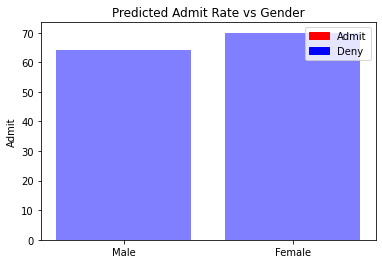

In [ ]:
#graph out predicted to admit vs gender type

#make differnet dfs depending on race
# selecting rows based on condition
male_df = X_new[X_new['Gender_Male'] == 1]
female_df = X_new[X_new['Gender_Male'] == 0]

male_counts_admit = (male_df['Admit_p'] == 1).sum()
male_counts_na = (male_df['Admit_p'] == 0).sum()
female_counts_admit = (female_df['Admit_p'] == 1).sum()
female_counts_na = (female_df['Admit_p'] == 0).sum()
objects = ("Male","Female")
y_pos = np.arange(len(objects))
admit_gender = [male_counts_admit, female_counts_admit]
na_gender = [male_counts_na, female_counts_na]




plt.bar(y_pos, admit_gender, align='center', alpha=0.5, color = 'r')
plt.bar(y_pos, na_gender, align='center', alpha=0.5,bottom=admit_gender,color = 'b')

colors = {'Admit':'red', 'Deny':'Blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(y_pos, objects)
plt.ylabel('Admit')
plt.title('Predicted Admit Rate vs Gender')



plt.show()


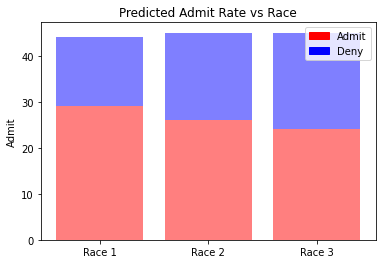

In [ ]:
#graph out predicted to admit vs race type

#make differnet dfs depending on race
# selecting rows based on condition
r1_df = X_new[X_new['Race'] == 1]
r2_df = X_new[X_new['Race'] == 2]
r3_df = X_new[X_new['Race'] == 3]

r1_admit = (r1_df['Admit_p'] == 1).sum()
r1_na = (r1_df['Admit_p'] == 0).sum()
r2_admit = (r2_df['Admit_p'] == 1).sum()
r2_na = (r2_df['Admit_p'] == 0).sum()
r3_admit = (r3_df['Admit_p'] == 1).sum()
r3_na = (r3_df['Admit_p'] == 0).sum()
objects = ("Race 1","Race 2", "Race 3")
y_pos = np.arange(len(objects))
admit_race = [r1_admit, r2_admit,r3_admit]
na_race = [r1_na, r2_na,r3_na]




plt.bar(y_pos, admit_race, align='center', alpha=0.5, color = 'r')
plt.bar(y_pos, na_race, align='center', alpha=0.5,bottom=admit_race,color = 'b')

colors = {'Admit':'red', 'Deny':'Blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(y_pos, objects)
plt.ylabel('Admit')
plt.title('Predicted Admit Rate vs Race')



plt.show()